In [17]:
#13/12/2024

In [18]:
import cv2
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt
import plotly.express as px

In [19]:
# !pip install  opencv-python

Este bloque es solo para colab

In [20]:
from google.colab import drive
from google.colab.patches import cv2_imshow
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Ruta para los datos

In [21]:
# ruta para colab
path = "/content/drive/My Drive/Clara del Rey/BIG DATA/Programacion/FTP/000 Datos/imagenes"
os.chdir(path)
# ruta en local
# os.chdir("../datos/imagenes/")

Para leer una imagen se usa imread(ruta). Para imágenes en color, el orden es BGR.

In [22]:
img = cv2.imread('ai_competition.png')
img.shape
# el 3 indica que: una imagen a color son 3 imagenes superpuestas, es un tensor

(258, 300, 3)

Para mostrar una imagen en cv2 se usa imshow, pero en notebooks da problemas. Se puede usar matplotlib (o plotly express) para mostrarlas, pero antes hay que cambiar el orden de los canales por matplotlib espera orden RGB.

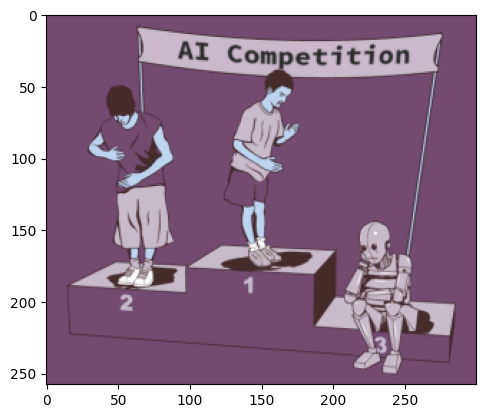

In [23]:
plt.imshow(img)
plt.show()

In [24]:
px.imshow(img)

Para cambiar el orden de los canales se puede usar una función o invertir la última dimensión de la matriz.

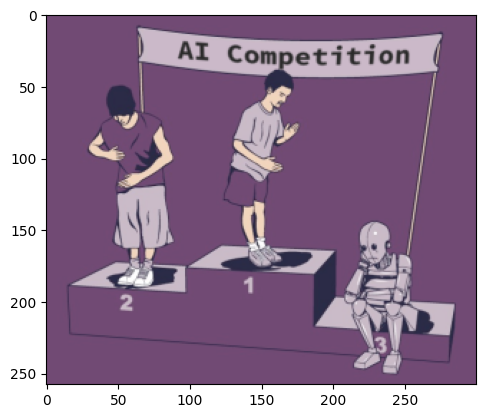

In [25]:
# img es una matriz de 3 dimensiones, un tensor
canalesbien = img[:,:,::-1]

# cvt: convert color de BGR a RGB:
# canalesbien = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(canalesbien)
plt.show()

En colab, se puede usar una función específica y no hay que cambiar los canales

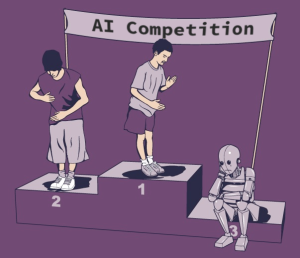

In [26]:
cv2_imshow(img)

En los notebooks de Jupyter se puede usar cv2.imshow(), pero sale en una ventana nueva, no el notebook

In [44]:
# cv2.imshow("pruebase", img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [28]:
img.shape

(258, 300, 3)

Algunas funciones básicas:


*   Cambiar de tamaño

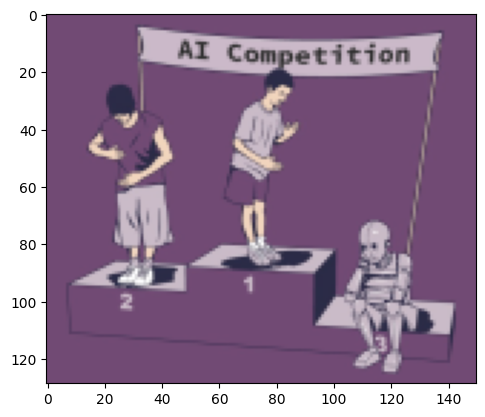

In [29]:
img = canalesbien.copy()

# el tamano de la nueva img reducida se pasa en formato ancho y alto:
reducida = cv2.resize(img, (int(img.shape[1]/2), int(img.shape[0]/2)))

plt.imshow(reducida)
plt.show()

Probar otra interpolación

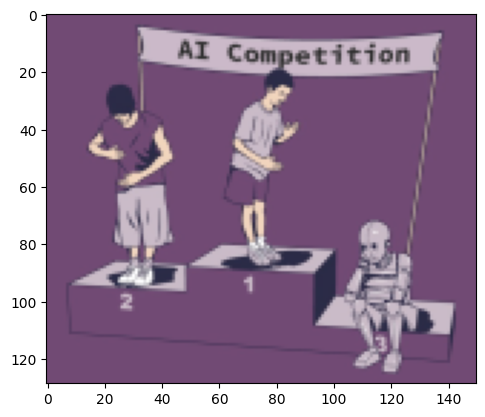

In [30]:
reducida = cv2.resize(img, (int(img.shape[1]/2), int(img.shape[0]/2)),cv2.INTER_AREA)
plt.imshow(reducida)
plt.show()

*   Obtener una parte de la imagen



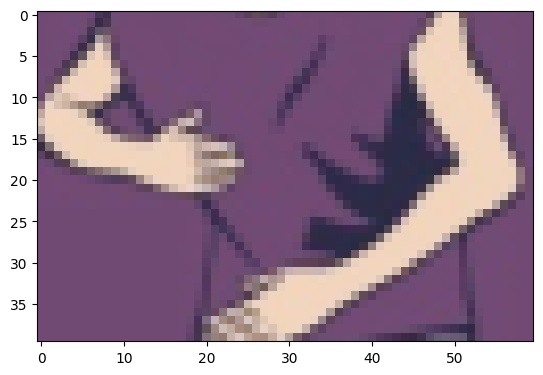

In [31]:
# filas: 40 --> 80-120
# columnas: 60 --> 90-30

region = img[80:120, 30:90, :]
plt.imshow(region)
plt.show()

*    Salvar la imagen (hay que deshacer el cambio de orden de las capas)

In [32]:
cv2.imwrite("parte.png", region[:,:,::-1])

True


*   Rotación


Con rotate() solo se pueden usar múltiplos de 90 predefinidos

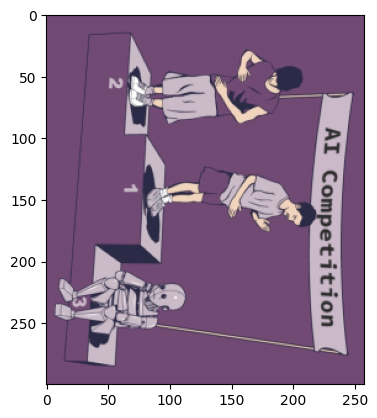

In [33]:
rotada = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
plt.imshow(rotada)
plt.show()

\Para una rotación genérica hay que usar una matriz de rotación
[Doc](https://docs.opencv.org/3.4/d4/d61/tutorial_warp_affine.html)



*   Transponer, dar la vuelta



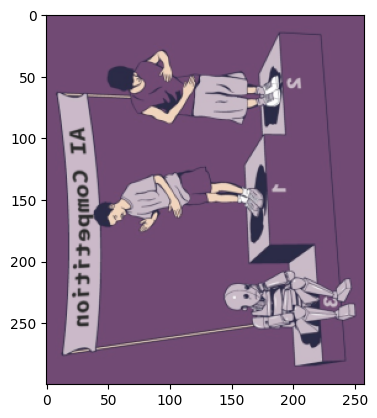

In [34]:
plt.imshow(cv2.transpose(img))
plt.show()

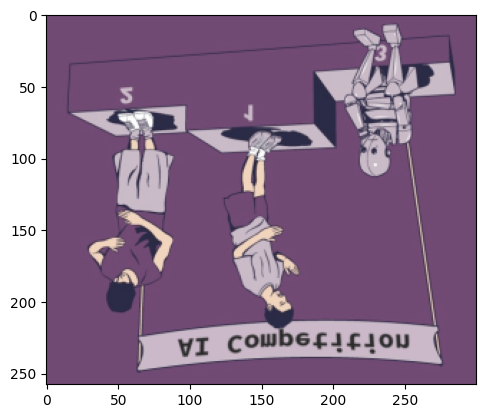

In [35]:
# flipCode = 1, -1, 0
plt.imshow(cv2.flip(img, flipCode = 0))
plt.show()



*  Pasar a blanco y negro



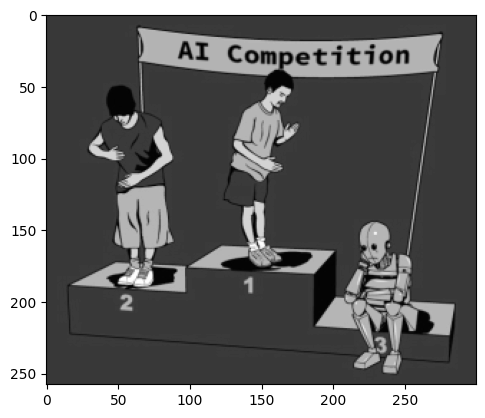

In [36]:
# ojo a la constante y al cmap
gris = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(gris, cmap="gray")
plt.show()

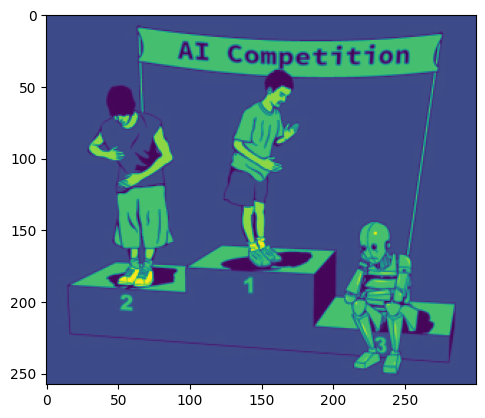

In [46]:
# Para que se interprete como una escala de grises hay que usar el cmap de grises
gris = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(gris)
plt.show()

In [37]:
gris.shape

(258, 300)

Pasar a blanco  y negro "a mano", calculando el valor de cada píxel como la media de las tres capas.

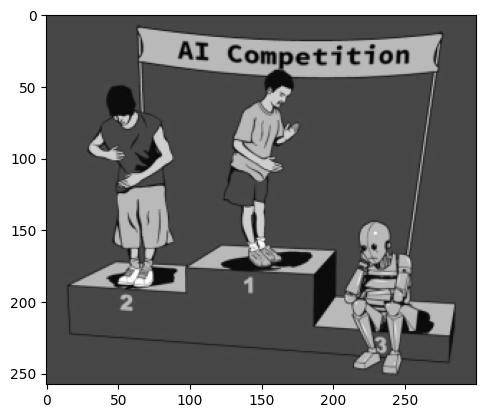

In [38]:
escalagris = img.mean(axis = 2)
plt.imshow(escalagris, cmap="gray")
plt.show()

In [39]:
escalagris.shape

(258, 300)

Probar la función blur para:
- difuminar una imagen.
- difuminar la parte central de una imagen.

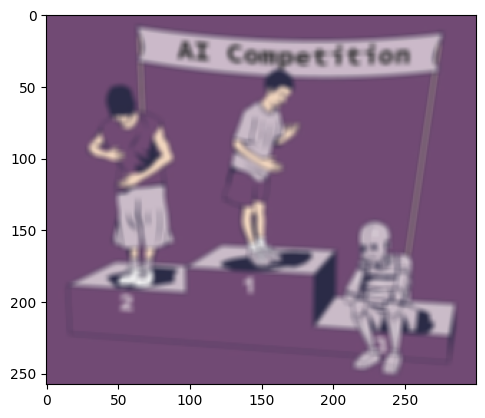

In [40]:
dif = cv2.blur(img, (5, 5))
plt.imshow(dif)
plt.show()

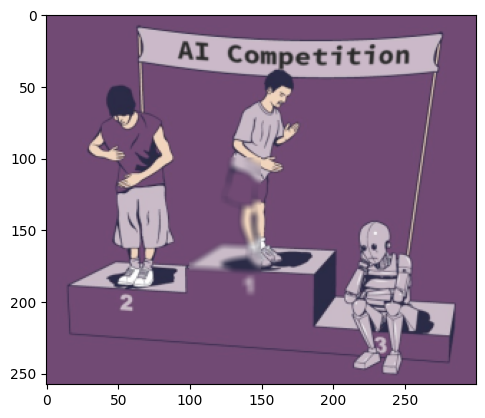

In [41]:
xini = 100
xfin = 150
yini = 100
yfin = 200

# difuminar la parte central
dif = cv2.blur( img[yini:yfin ,xini:xfin, :], (5, 5))

# poner el trozo sobre la imagen original
img[yini:yfin, xini:xfin, :] = dif
plt.imshow(img)
plt.show()

Para convertir a PIL. Si cargamos una imagen con cv2.imread(), para convertir a PIL hay que invertir los canales y llamar a la función fromArray de PIL

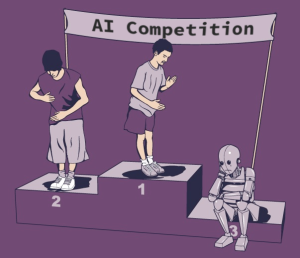

In [42]:
img = cv2.imread('ai_competition.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
imPIL = Image.fromarray(img)
imPIL

Para convertir desde PIL. Se obtiene la matriz usando array y se invierten los canales.

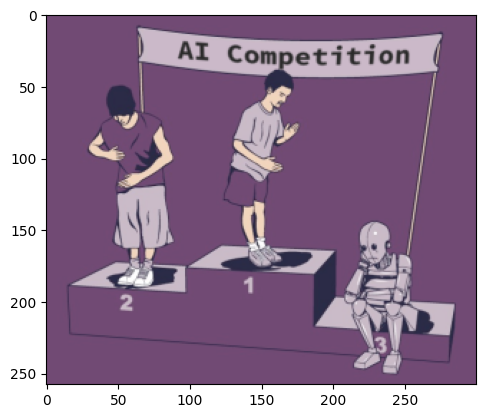

In [43]:
imPIL = Image.open('ai_competition.png')
img = np.array(imPIL)
canalesbiencv2 = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
# para mostrarlo con plt hay que invertir los canales de nuevo
plt.imshow(canalesbiencv2[:,:,::-1])